# Introduction

Data pulled from https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset which includes employee Attrition and Performance data.  The data set includes survey data regarding employees feelings towards their job, work life balance, and factors outside of the office.  This data might be of interest to a company looking for a reason why they are losing employees.  This information could help them strengthen employee retention by addressing the root issue derived from taking a closer look into the nuances in the data.

# Questions

Some questions we'd like to answer are:

1) How many employees have left the company and how many have stayed?  What do these groups look like?

2) What are the ages of people staying/leaving the company?  Perhaps they are younger/older and more/less experienced?

3) What might be a reason why employees are leaving?  Is there information that might help identify a root cause?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('C:/Users/Phillip/Pictures/Box Sync/My Python Programs/Data Science/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head(10)
# Education 
# 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

# EnvironmentSatisfaction 
# 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

# JobInvolvement
# 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

# JobSatisfaction 
# 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

# PerformanceRating
# 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

# RelationshipSatisfaction
# 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

# WorkLifeBalance 
# 1 'Bad' 2 'Good' 3 'Better' 4 'Best'


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


# Getting Familiar
With .info() we can see all the columns.  Thankfully, all columns do not have NULL values.  This data set is clean. 

In [20]:
#snapshot view
df.info()

#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

# Simple Count Y or N
It makes the most sense to see how the two groups of employees compare, those who've left (attrition = yes) and those who have not.  Using the .groupby() and .agg() we can see a count of No vs Yes from the Attrition Column.

In [31]:
# How many employees show Yes or No in Attrition column?
df.groupby('Attrition').agg(['count'])

#there are 237 people that left their position versus 1233 people who did not.


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_#
,count,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
Attrition,,,,,,,,,,,,,,,,,,,,,
No,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,...,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233
Yes,237,237,237,237,237,237,237,237,237,237,...,237,237,237,237,237,237,237,237,237,237


There are 237 employees that a victims of attrition and 1233 employees that are not.  One group is much larger than the other.

Let's use .hist to get a general idea of some of our sample data's characteristics.

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

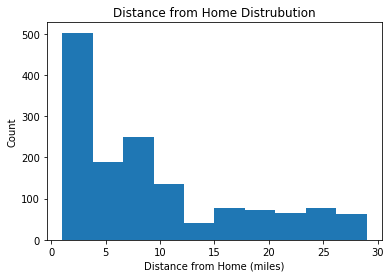

In [222]:
plt.hist(df['DistanceFromHome'])
plt.xlabel('Distance from Home (miles)')
plt.ylabel('Count')
plt.title('Distance from Home Distrubution')
df['DistanceFromHome'].describe()
# most people working live less than 10 miles from work

Most employees live less than 10 miles from work, so this probably isn't a factor in attrition.  Let's get a feel for sample's age next.

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

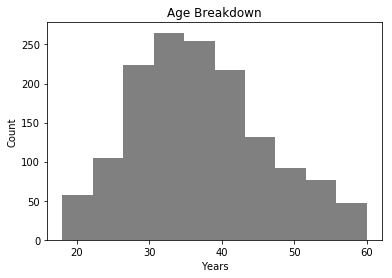

In [224]:
plt.hist(df['Age'], color = 'grey')
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Age Breakdown')
df['Age'].describe()

The average age is about 37 years old, 1 out of 2 employees are 36 years or younger.  

Maybe attrition has something to do with money?  Maybe it could be related to time spent at the company compared to the raise someone gets after a promotion?

Let's plot it on a scatter and see how things group up to get an idea of what kind of raise can employees expect after given time working at the company?

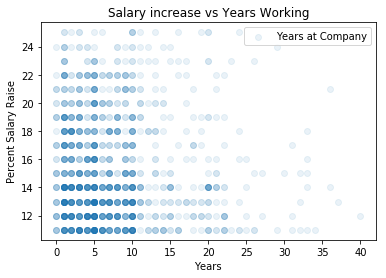

count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

In [5]:
y = df['PercentSalaryHike']
z = df['YearsAtCompany']
 
plt.scatter(z, y, alpha=0.09, label='Years at Company')
plt.legend(loc='best') 
plt.xlabel('Years')
plt.ylabel('Percent Salary Raise')
plt.title('Salary increase vs Years Working')
plt.show() 
df.PercentSalaryHike.describe()

The scatter shows a concentration around 5 years of a 10% to 14% increase in salary.  Staying at the company longer does not increase the amount of the raise %.

To get a raise, you probably need a promotion!

What can employees expect in terms of the rate of promotions being awarded?


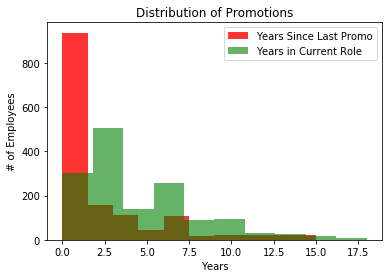

Years in Current Role Summary


count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

In [157]:
pop3 = df['YearsSinceLastPromotion']
pop2 = df['YearsInCurrentRole']


plt.hist(pop3, alpha=0.8, color='r', label='Years Since Last Promo') 
plt.hist(pop2, alpha=0.6, color = 'g',label='Years in Current Role')

plt.legend(loc='upper right') 
plt.xlabel('Years')
plt.ylabel('# of Employees')
plt.title('Distribution of Promotions')
plt.show() 


print("Years in Current Role Summary")
df.YearsInCurrentRole.describe()

 At the time the data was collected, more employee have been promoted in the the last year than those holding their current position for 2.5 years or so. 50% of employees hold their position for 3 years or less.
 
 Now it's time to compare the groups of attrition Yes vs No.  To take a closer look, we'll make a new dataframe filter to show just entries where Attrition = Yes.


In [184]:
attrition_pop = df[df.Attrition == 'Yes']
attrition_pop_for_plots = attrition_pop.copy()
print(attrition_pop_for_plots)


      Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
2      37       Yes      Travel_Rarely       1373  Research & Development   
14     28       Yes      Travel_Rarely        103  Research & Development   
21     36       Yes      Travel_Rarely       1218                   Sales   
24     34       Yes      Travel_Rarely        699  Research & Development   
26     32       Yes  Travel_Frequently       1125  Research & Development   
33     39       Yes      Travel_Rarely        895                   Sales   
34     24       Yes      Travel_Rarely        813  Research & Development   
36     50       Yes      Travel_Rarely        869                   Sales   
42     26       Yes      Travel_Rarely       1357  Research & Development   
45     41       Yes      Travel_Rarely       1360  Research & Development   
50     48       Yes      Travel_Rarely        626  Research & Development   

In [185]:
print('Attrition Population Summary')
attrition_pop_for_plots.describe() 

Attrition Summary


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,401.899519,8.452525,1.008244,0.0,580.750572,1.169791,20.099958,0.773405,0.940594,...,1.125437,0.0,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,31.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,408.000000,3.000000,2.000000,1.0,514.000000,1.000000,50.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,699.000000,9.000000,3.000000,1.0,1017.000000,3.000000,66.000000,3.000000,1.000000,...,3.000000,80.0,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1092.000000,17.000000,4.000000,1.0,1486.000000,4.000000,84.000000,3.000000,2.000000,...,4.000000,80.0,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1496.000000,29.000000,5.000000,1.0,2055.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


Using .describe() on this new dataframe gives us a nice snapshot at the global statistics of the Attrition group.  For example,
average age of attrition is between 33 and 34 years of age, slightly younger than the global average but not really significant.

Moving forward, taking a closer look at the population that did not attrition by making a new dataframe and using .describe()

In [108]:
attrition_pop2 = df[df.Attrition == 'No']
attrition_pop_for_plots2 = attrition_pop2.copy()

attrition_pop_for_plots2.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_#
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.0
mean,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,...,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397,0.0
std,8.888360,403.208379,8.012633,1.027002,0.0,606.217074,1.071132,20.380754,0.692050,1.117933,...,0.0,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116,0.0
min,18.000000,102.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,31.000000,477.000000,2.000000,2.000000,1.0,483.000000,2.000000,48.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.0
50%,36.000000,817.000000,7.000000,3.000000,1.0,1022.000000,3.000000,66.000000,3.000000,2.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000,0.0
75%,43.000000,1176.000000,13.000000,4.000000,1.0,1574.000000,4.000000,83.000000,3.000000,3.000000,...,80.0,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,0.0
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,80.0,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000,0.0


Using the separated information for Attrition Y/N, we can start to make some comparisions.  What is the age difference between those who stay and those who leave?

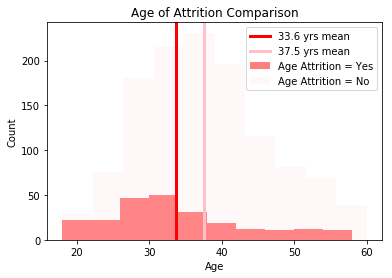

In [128]:
plt.hist(attrition_pop_for_plots.Age, alpha=.5, color='red', label='Age Attrition = Yes')
plt.axvline(attrition_pop_for_plots.Age.mean(), color='red', label='33.6 yrs mean', linestyle='solid', linewidth='3')

plt.hist(attrition_pop_for_plots2.Age, alpha=.1, color='pink', label = 'Age Attrition = No')
plt.axvline(attrition_pop_for_plots2.Age.mean(), color='pink', label='37.5 yrs mean', linestyle='solid', linewidth='3')

plt.legend(loc='upper right') 
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age of Attrition Comparison')
plt.show()

The difference in the heights of the histogram is due to the large difference in sample size between those who stay and those who leave work.

Overall, there is a lower age for people who leave due to attrition 33.6 vs 37.5, so aroughly 4 year gap.  Not really significant, yet.

Moving forward, there is a column that recorded answers to a Job Satisfaction Survey.  The key to help interpret the graph is:

# JobSatisfaction

1 'Low' 
2 'Medium' 
3 'High' 
4 'Very High'

Text(0.5, 1.0, 'Job Satisfaction')

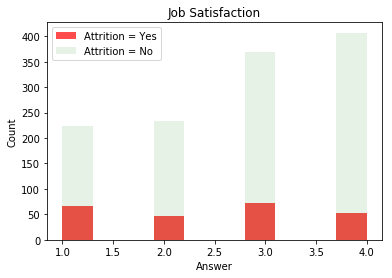

In [207]:
attrition_pop_for_plots['JobSatisfaction'].describe()

plt.hist(attrition_pop_for_plots.JobSatisfaction,  alpha=.7, color='red', label='Attrition = Yes')
plt.hist(attrition_pop_for_plots2.JobSatisfaction, alpha=.1, color='green', label='Attrition = No')

plt.legend(loc='best') 
plt.xlabel('Answer')
plt.ylabel('Count')
plt.title('Job Satisfaction')

We might expect answers for those employees who left to show more 1's and 2's for low to medium satisfaction in their job.  Job satisfaction doesn't fully explain why employees have left.  This might be a weak comparision.

Maybe we can compare the differnces between the two dataframes created for the Yes and No attrition groups directly and see what the numbers show before choosing a direction to move forwards with.

In [211]:
import pandas as pd
pd.set_option('display.max_columns', 500)
attrition_pop_for_plots.describe() - attrition_pop_for_plots2.describe()

,Age,Attrition_#,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,-996.000000,NaN,-996.000000,-996.000000,-996.000000,-996.0,-996.000000,-996.000000,-996.000000,-996.000000,-996.000000,-996.000000,-996.000000,-996.000000,-996.000000,-996.000000,-996.000000,-996.000000,-996.0,-996.000000,-996.000000,-996.000000,-996.000000,-996.000000,-996.000000,-996.000000,-996.000000
mean,-3.953638,NaN,-62.141591,1.717259,-0.087345,0.0,-17.310132,-0.307155,-0.378310,-0.251491,-0.508855,-0.310234,-2045.646832,293.528617,0.295348,-0.134097,0.002833,-0.134826,0.0,-0.317667,-3.618210,-0.208455,-0.122794,-2.238217,-1.581231,-0.289240,-1.515076
std,0.800990,NaN,-1.308860,0.439892,-0.018758,0.0,-25.466502,0.098659,-0.280797,0.081355,-0.177339,0.024781,-1177.997634,105.892515,0.218428,0.130783,0.003328,0.053834,0.0,0.014376,-0.591515,-0.038801,0.134546,-0.146314,-0.474575,-0.081685,-0.450767
min,0.000000,NaN,1.000000,0.000000,0.000000,0.0,-1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-42.000000,232.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.000000,NaN,-69.000000,1.000000,0.000000,0.0,31.000000,-1.000000,2.000000,0.000000,0.000000,-1.000000,-838.000000,897.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-3.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000,-2.000000
50%,-4.000000,NaN,-118.000000,2.000000,0.000000,0.0,-5.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-2002.000000,498.000000,-1.000000,0.000000,0.000000,0.000000,0.0,-1.000000,-3.000000,-1.000000,0.000000,-3.000000,-1.000000,0.000000,-1.000000
75%,-4.000000,NaN,-84.000000,4.000000,0.000000,0.0,-88.000000,0.000000,1.000000,0.000000,-1.000000,-1.000000,-2918.000000,717.000000,1.000000,-1.000000,0.000000,0.000000,0.0,0.000000,-6.000000,0.000000,0.000000,-3.000000,-3.000000,-1.000000,-2.000000
max,-2.000000,NaN,-3.000000,0.000000,0.000000,0.0,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-140.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,3.000000,-3.000000,0.000000,-3.000000


Scanning the difference in mean between the dataframe with attrition = yes against attrition = no.  We can see, on average, envrionment satisfaction, hourly rate, job satisfaction, and relationship satisfaction (among other columns) that the two groups are very close.  The difference in averages is negligable.

However, the $2,045 difference in Monthly income bewteen the two groups is striking.  That is a large discrepancy in Monthly Income where employee who've left were earning less than employees who've stayed.

Let's see how the distribution looks with a histogram references the two groups' incomes.

Text(0.5, 1.0, 'Monthly Income of Attrition Yes vs No')

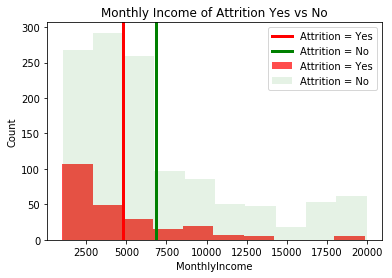

In [215]:
plt.hist(attrition_pop_for_plots.MonthlyIncome,  alpha=.7, color='red', label='Attrition = Yes')
plt.axvline(attrition_pop_for_plots.MonthlyIncome.mean(), color='red', label='Attrition = Yes', linestyle='solid', linewidth='3')

plt.hist(attrition_pop_for_plots2.MonthlyIncome, alpha=.1, color='green', label='Attrition = No')
plt.axvline(attrition_pop_for_plots2.MonthlyIncome.mean(), color='green', label='Attrition = No', linestyle='solid', linewidth='3')


plt.legend(loc='best') 
plt.xlabel('MonthlyIncome')
plt.ylabel('Count')
plt.title('Monthly Income of Attrition Yes vs No')


On average, those that leave were earning 2,000 less per month then their peers that stayed this might be a possible reason for attrition. It might be people upset with their income who leave.

I feel the need to be careful however, because the distribution shows a greater number higher paid employees which might skew this kind of reasoning and conclusion.

# Conclusion
Future research might include just collecting more data.  Perhaps it would be beneficial to normalize the distrubutions to make comparisions between groups of employees.  One side of the population, Attrition = No, has significantly more data to look at than Attrition = Yes.  This must have some kind of effect on how reliable the story for why employees leave will be.  From looking at other columns, there might be more intelligent ways of predicting Attrition or finding a reason why the employees in question left their positions.  From browsing the internet and looking at other works, there are machine learning models that can be applied to help predict when attrition might occur!  These models seem to factor in most of the data provided, which can find the nuanced relationship between employees answers to more interesting questions while linking other aspects of the dataset that might be less obvious otherwise.